In [1]:
%matplotlib inline

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def applyKernel(image, kernel,transformation):
    filtered_image = np.zeros_like(image)
    padded_image = np.zeros((image.shape[0]+kernel.shape[0]-1,image.shape[1] + kernel.shape[1]-1))
    padded_image[kernel.shape[0]-2:-1:,kernel.shape[1]-2:-1:] = image
    padded_image[0,0]=image[0,0]
    padded_image[-1,-1]=image[-1,-1]
    
    for w in range(image.shape[1]):
        for h in range(image.shape[0]):
                xstart = w
                xend = w + kernel.shape[0]
                ystart = h
                yend = h + kernel.shape[1]
                image_slice = padded_image[ystart: yend , xstart: xend]
                product = kernel * image_slice
                totalsum = np.sum(product)
#                 For Dilation
                if transformation == 'dilation':
                    if totalsum>0:
                        filtered_image[h, w]=1
                    else :
                        filtered_image[h, w]=0
#                         For Erosion
                elif transformation == 'erosion':
                    if totalsum==5:
                        filtered_image[h, w]=1
                    else :
                        filtered_image[h, w]=0 
    return filtered_image



def binaryconversion(gray_img):
    return (127 < gray_img) & (gray_img <= 255)

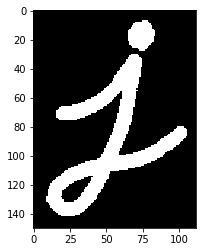

In [3]:
img = np.array(Image.open('./assets/morphological.png'))

r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
gray_img = 0.2989 * r + 0.5870 * g + 0.1140 * b


# height = gray_img.shape[0]
# width = gray_img.shape[1]
# threshold = 150

# for i in np.arange(height):
#     for j in np.arange(width):
#         a = gray_img.item(i,j) 
#         if a > threshold:
#                b = 255
#         else:
#                b = 0
#     gray_img.itemset((i,j), b)


kernel =np.array([[0, 1, 0],
                              [1, 1, 1],
                              [0, 1, 0]])    
binary_img = binaryconversion(gray_img)

# Dilation
dilated_img = applyKernel(binary_img , kernel , 'dilation')
dilated_img=Image.fromarray(dilated_img).convert('RGB')
plt.imshow(dilated_img)
dilated_img.save('./outputs/dilated_img.jpg')

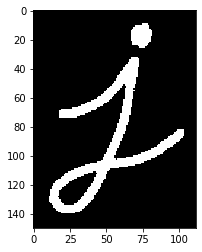

In [4]:
# Erosion
eroded_img = applyKernel(binary_img , kernel , 'erosion')
eroded_img=Image.fromarray(eroded_img).convert('RGB')
plt.imshow(eroded_img)
eroded_img.save('./outputs/eroded_img.jpg')

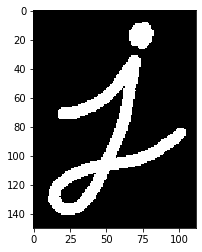

In [5]:
# Opening
opening_img = applyKernel(binary_img , kernel , 'erosion')
opening_img = applyKernel(opening_img , kernel , 'dilation')
opening_img=Image.fromarray(opening_img).convert('RGB')
plt.imshow(opening_img)
opening_img.save('./outputs/opening_img.jpg')

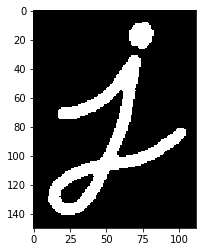

In [6]:
# Closing
closing_img = applyKernel(binary_img , kernel , 'dilation')
closing_img = applyKernel(closing_img , kernel , 'erosion')
closing_img=Image.fromarray(closing_img).convert('RGB')
plt.imshow(closing_img)
closing_img.save('./outputs/closing_img.jpg')

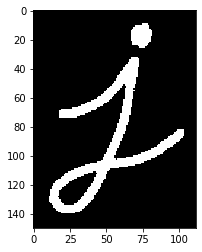

In [7]:
# Edge Detection
erode = applyKernel(binary_img , kernel , 'erosion')
erode=Image.fromarray(erode).convert('RGB')
plt.imshow(erode)